<a href="https://colab.research.google.com/github/uhryvacheuski/Portfolio-Theory/blob/main/LPPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
!pip install lppls
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [89]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
from google.colab import files
import io
%matplotlib inline

In [113]:
uploaded = files.upload()

Saving dane.xlsx to dane (1).xlsx


In [114]:
data = pd.read_excel(io.BytesIO(uploaded['dane.xlsx']))
data['Year'] = data["YYYYMMM"].str[:4]
data['Month'] = data["YYYYMMM"].str[5:]
data['Date'] = data['Year'].apply(str)+"-"+data['Month']+"-"+"01"

In [122]:
pd.read_excel(io.BytesIO(uploaded['dane.xlsx'])).head()

,YYYYMMM,CRUDE_PETRO,CRUDE_BRENT,CRUDE_DUBAI,CRUDE_WTI,COAL_AUS,COAL_SAFRICA,NGAS_US,NGAS_EUR,NGAS_JP,...,ALUMINUM,IRON_ORE,COPPER,LEAD,Tin,NICKEL,Zinc,GOLD,PLATINUM,SILVER
0,1960M01,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,715.40,206.1,2180.4,1631.0,260.8,35.27,83.5,0.9137
1,1960M02,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,728.19,203.7,2180.4,1631.0,244.9,35.27,83.5,0.9137
2,1960M03,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.94,210.3,2173.8,1631.0,248.7,35.27,83.5,0.9137
3,1960M04,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,723.11,213.6,2178.2,1631.0,254.6,35.27,83.5,0.9137
4,1960M05,1.63,NaN,1.63,NaN,NaN,NaN,0.14,0.404774,NaN,...,511.471832,11.42,684.75,213.4,2162.7,1631.0,253.8,35.27,83.5,0.9137


In [120]:
COMMODITY = 'CRUDE_WTI'

In [115]:
data[['Date',COMMODITY]][COMMODITY].dropna()

264     35.30
265     34.80
266     32.60
267     30.70
268     30.60
        ...  
744     83.12
745     91.74
746    108.49
747    101.78
748    109.60
Name: CRUDE_WTI, Length: 485, dtype: float64

In [116]:
# read example dataset into df 

data = data[['Date',COMMODITY]].dropna()

# convert time to ordinal
time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in data['Date']]

# create list of observation data
price = np.log(data[COMMODITY].values)
observations=np.array([time, price])

# create observations array (expected format for LPPLS observations)
# set the max number for searches to perform before giving-up
# the literature suggests 25

MAX_SEARCHES = 25



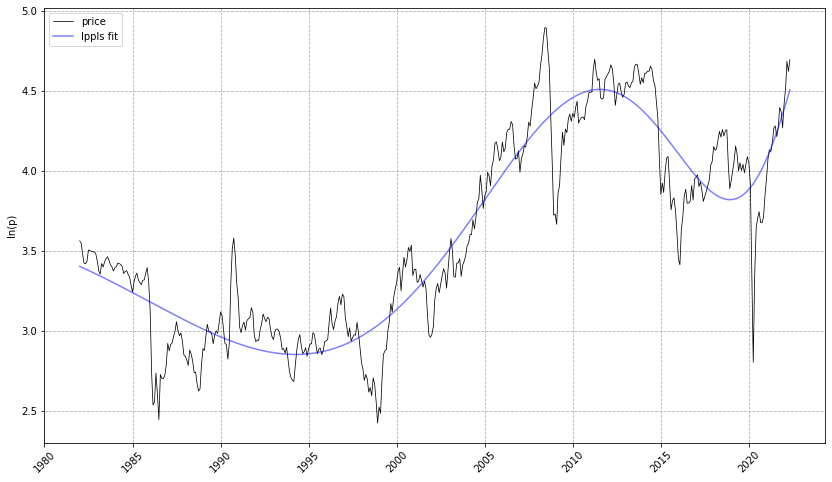

In [117]:
# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations=observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

# visualize the fit
lppls_model.plot_fit()

# should give a plot like the following...

In [118]:
res = lppls_model.mp_compute_nested_fits(
    workers=8,
    window_size=42, 
    smallest_window_size=2, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25
)

100%|██████████| 444/444 [03:35<00:00,  2.06it/s]


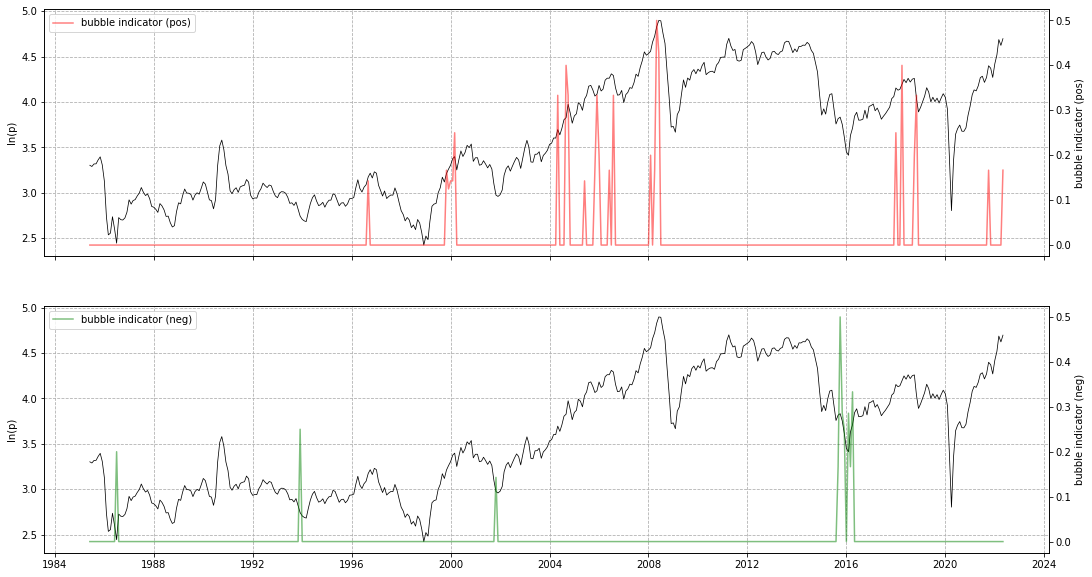

In [119]:
lppls_model.plot_confidence_indicators(res)